## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3         X4           Y
0  66.742196  140.188199  0.068101   6.079425   67.496323
1  21.371021  540.965793  0.586190  10.388236  317.727250
2  77.655092  302.202602  0.273658   4.847698  113.392021
3  17.433835  238.200746  0.252494   6.031835   62.664122
4  82.519580  986.720792  0.624677   5.714131  621.981273


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0277556	total: 68.1ms	remaining: 1m 8s
1:	learn: 1.0138338	total: 68.6ms	remaining: 34.2s
2:	learn: 1.0049809	total: 69.1ms	remaining: 23s
3:	learn: 0.9952146	total: 69.5ms	remaining: 17.3s
4:	learn: 0.9828125	total: 70.1ms	remaining: 13.9s
5:	learn: 0.9721890	total: 70.6ms	remaining: 11.7s
6:	learn: 0.9591349	total: 71.1ms	remaining: 10.1s
7:	learn: 0.9467005	total: 71.5ms	remaining: 8.87s
8:	learn: 0.9345329	total: 72ms	remaining: 7.92s
9:	learn: 0.9208251	total: 72.6ms	remaining: 7.18s
10:	learn: 0.9102035	total: 73ms	remaining: 6.57s
11:	learn: 0.8981717	total: 73.5ms	remaining: 6.05s
12:	learn: 0.8875034	total: 74ms	remaining: 5.62s
13:	learn: 0.8746380	total: 74.5ms	remaining: 5.24s
14:	learn: 0.8650823	total: 74.9ms	remaining: 4.92s
15:	learn: 0.8559996	total: 75.3ms	remaining: 4.63s
16:	learn: 0.8442638	total: 75.8ms	remaining: 4.38s
17:	learn: 0.8351736	total: 76.2ms	remaining: 4.16s
18:	learn: 0.8267651	total: 76.7ms	remaining: 3.96s


89:	learn: 0.3766500	total: 108ms	remaining: 1.09s
90:	learn: 0.3730591	total: 109ms	remaining: 1.08s
91:	learn: 0.3705246	total: 109ms	remaining: 1.07s
92:	learn: 0.3670647	total: 109ms	remaining: 1.07s
93:	learn: 0.3629412	total: 110ms	remaining: 1.06s
94:	learn: 0.3589720	total: 110ms	remaining: 1.05s
95:	learn: 0.3553410	total: 111ms	remaining: 1.04s
96:	learn: 0.3511371	total: 111ms	remaining: 1.03s
97:	learn: 0.3473816	total: 112ms	remaining: 1.03s
98:	learn: 0.3440627	total: 112ms	remaining: 1.02s
99:	learn: 0.3397430	total: 112ms	remaining: 1.01s
100:	learn: 0.3356309	total: 113ms	remaining: 1s
101:	learn: 0.3323129	total: 113ms	remaining: 998ms
102:	learn: 0.3290610	total: 114ms	remaining: 992ms
103:	learn: 0.3260015	total: 114ms	remaining: 985ms
104:	learn: 0.3229997	total: 115ms	remaining: 978ms
105:	learn: 0.3191901	total: 115ms	remaining: 971ms
106:	learn: 0.3163649	total: 115ms	remaining: 963ms
107:	learn: 0.3137193	total: 116ms	remaining: 957ms
108:	learn: 0.3106884	tota

232:	learn: 0.1118808	total: 170ms	remaining: 559ms
233:	learn: 0.1109164	total: 170ms	remaining: 558ms
234:	learn: 0.1099992	total: 171ms	remaining: 556ms
235:	learn: 0.1091902	total: 171ms	remaining: 554ms
236:	learn: 0.1084928	total: 172ms	remaining: 552ms
237:	learn: 0.1076512	total: 172ms	remaining: 551ms
238:	learn: 0.1070303	total: 172ms	remaining: 549ms
239:	learn: 0.1059667	total: 173ms	remaining: 547ms
240:	learn: 0.1052338	total: 173ms	remaining: 545ms
241:	learn: 0.1043919	total: 174ms	remaining: 544ms
242:	learn: 0.1036384	total: 174ms	remaining: 542ms
243:	learn: 0.1031368	total: 174ms	remaining: 540ms
244:	learn: 0.1023500	total: 175ms	remaining: 539ms
245:	learn: 0.1016226	total: 175ms	remaining: 537ms
246:	learn: 0.1010915	total: 176ms	remaining: 536ms
247:	learn: 0.1004416	total: 176ms	remaining: 534ms
248:	learn: 0.0997382	total: 177ms	remaining: 533ms
249:	learn: 0.0989961	total: 177ms	remaining: 531ms
250:	learn: 0.0984078	total: 178ms	remaining: 530ms
251:	learn: 

461:	learn: 0.0334565	total: 272ms	remaining: 317ms
462:	learn: 0.0332634	total: 272ms	remaining: 316ms
463:	learn: 0.0331708	total: 273ms	remaining: 315ms
464:	learn: 0.0329823	total: 273ms	remaining: 315ms
465:	learn: 0.0328919	total: 274ms	remaining: 314ms
466:	learn: 0.0327529	total: 274ms	remaining: 313ms
467:	learn: 0.0326642	total: 275ms	remaining: 312ms
468:	learn: 0.0325287	total: 275ms	remaining: 312ms
469:	learn: 0.0324092	total: 276ms	remaining: 311ms
470:	learn: 0.0323222	total: 276ms	remaining: 310ms
471:	learn: 0.0322059	total: 277ms	remaining: 309ms
472:	learn: 0.0321205	total: 277ms	remaining: 309ms
473:	learn: 0.0320366	total: 277ms	remaining: 308ms
474:	learn: 0.0319214	total: 278ms	remaining: 307ms
475:	learn: 0.0318090	total: 278ms	remaining: 306ms
476:	learn: 0.0317275	total: 279ms	remaining: 305ms
477:	learn: 0.0316253	total: 279ms	remaining: 305ms
478:	learn: 0.0314020	total: 279ms	remaining: 304ms
479:	learn: 0.0313225	total: 280ms	remaining: 303ms
480:	learn: 

651:	learn: 0.0170705	total: 350ms	remaining: 187ms
652:	learn: 0.0170280	total: 351ms	remaining: 186ms
653:	learn: 0.0169750	total: 351ms	remaining: 186ms
654:	learn: 0.0169626	total: 352ms	remaining: 185ms
655:	learn: 0.0169347	total: 352ms	remaining: 185ms
656:	learn: 0.0168844	total: 352ms	remaining: 184ms
657:	learn: 0.0168568	total: 353ms	remaining: 183ms
658:	learn: 0.0168003	total: 353ms	remaining: 183ms
659:	learn: 0.0167672	total: 353ms	remaining: 182ms
660:	learn: 0.0167552	total: 354ms	remaining: 181ms
661:	learn: 0.0167433	total: 354ms	remaining: 181ms
662:	learn: 0.0166556	total: 355ms	remaining: 180ms
663:	learn: 0.0166003	total: 355ms	remaining: 180ms
664:	learn: 0.0165731	total: 355ms	remaining: 179ms
665:	learn: 0.0165188	total: 356ms	remaining: 178ms
666:	learn: 0.0164855	total: 356ms	remaining: 178ms
667:	learn: 0.0164577	total: 356ms	remaining: 177ms
668:	learn: 0.0163641	total: 357ms	remaining: 177ms
669:	learn: 0.0163528	total: 357ms	remaining: 176ms
670:	learn: 

893:	learn: 0.0081460	total: 453ms	remaining: 53.7ms
894:	learn: 0.0081186	total: 454ms	remaining: 53.3ms
895:	learn: 0.0080972	total: 454ms	remaining: 52.7ms
896:	learn: 0.0080503	total: 455ms	remaining: 52.2ms
897:	learn: 0.0080416	total: 455ms	remaining: 51.7ms
898:	learn: 0.0080143	total: 456ms	remaining: 51.2ms
899:	learn: 0.0079769	total: 456ms	remaining: 50.7ms
900:	learn: 0.0079433	total: 456ms	remaining: 50.1ms
901:	learn: 0.0079086	total: 457ms	remaining: 49.6ms
902:	learn: 0.0079001	total: 457ms	remaining: 49.1ms
903:	learn: 0.0078663	total: 458ms	remaining: 48.6ms
904:	learn: 0.0078417	total: 458ms	remaining: 48.1ms
905:	learn: 0.0078089	total: 459ms	remaining: 47.6ms
906:	learn: 0.0077835	total: 459ms	remaining: 47.1ms
907:	learn: 0.0077455	total: 459ms	remaining: 46.6ms
908:	learn: 0.0077339	total: 460ms	remaining: 46ms
909:	learn: 0.0077037	total: 460ms	remaining: 45.5ms
910:	learn: 0.0076913	total: 461ms	remaining: 45ms
911:	learn: 0.0076462	total: 461ms	remaining: 44.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

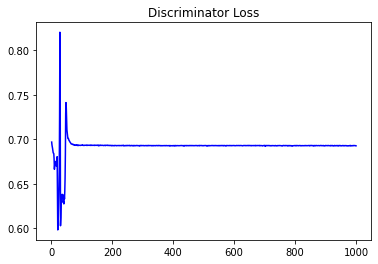

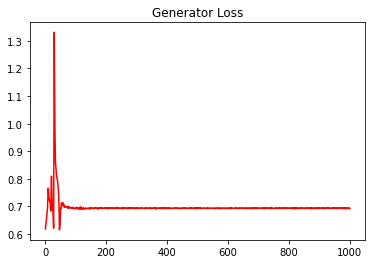

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02265393492651152


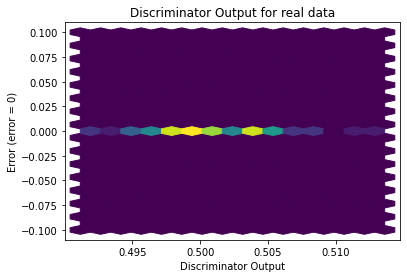

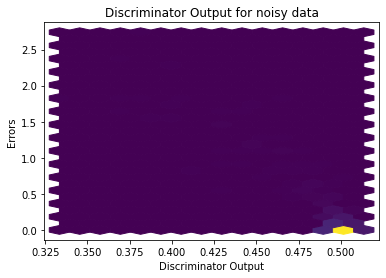

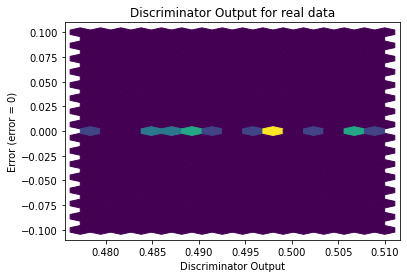

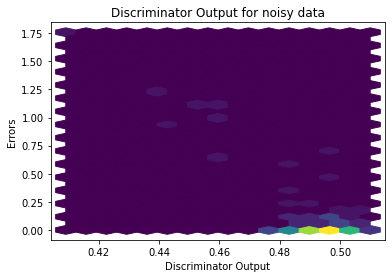

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


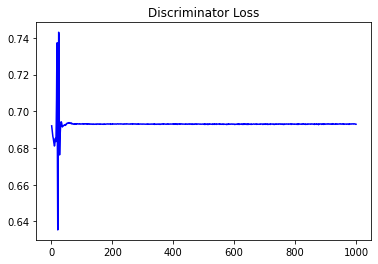

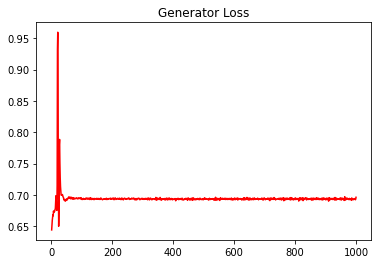

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.009674485438636032


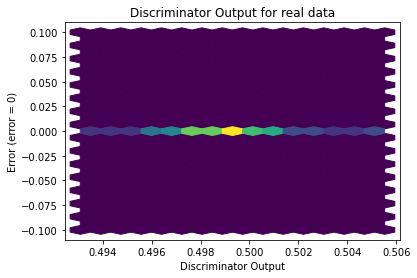

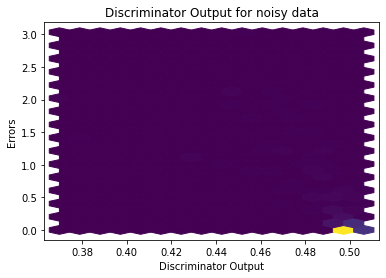

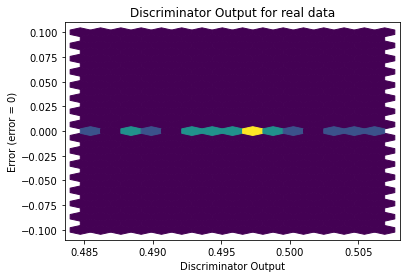

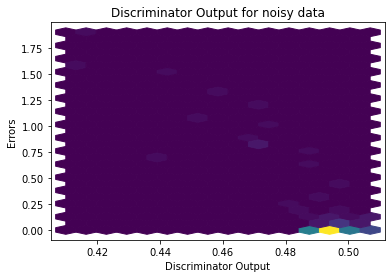

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6011]], requires_grad=True)
